In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import os

In [2]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf

In [3]:
title = ['time','open','high','low','close','volume','value']
df_train = pd.read_csv("/Users/lvang/Desktop/data/zhongxin.csv",header=None,skiprows=1,names=title, na_values=['NA', '?'])

In [5]:
df_train['log_RoR'] = np.log(df_train['open']/df_train['open'].shift(1))
R_mean = df_train['log_RoR'].mean()
R_std = df_train['log_RoR'].std()
df_train['nor_log_RoR'] = (df_train['log_RoR']-R_mean)/R_std
df_train['diff_NROR'] = df_train['nor_log_RoR'].diff(periods=1)

In [6]:
df = df_train[['diff_NROR','open']]
df = df[2:]
df = df.reset_index(drop=True)                    ######
df

,diff_NROR,open
0,0.936885,19.11
1,-0.624508,19.10
2,0.312131,19.11
3,-0.468279,19.09
4,0.312213,19.09
5,-0.625409,19.05
6,0.938277,19.07
7,-0.625737,19.05
8,0.938277,19.09
9,-1.250818,19.05


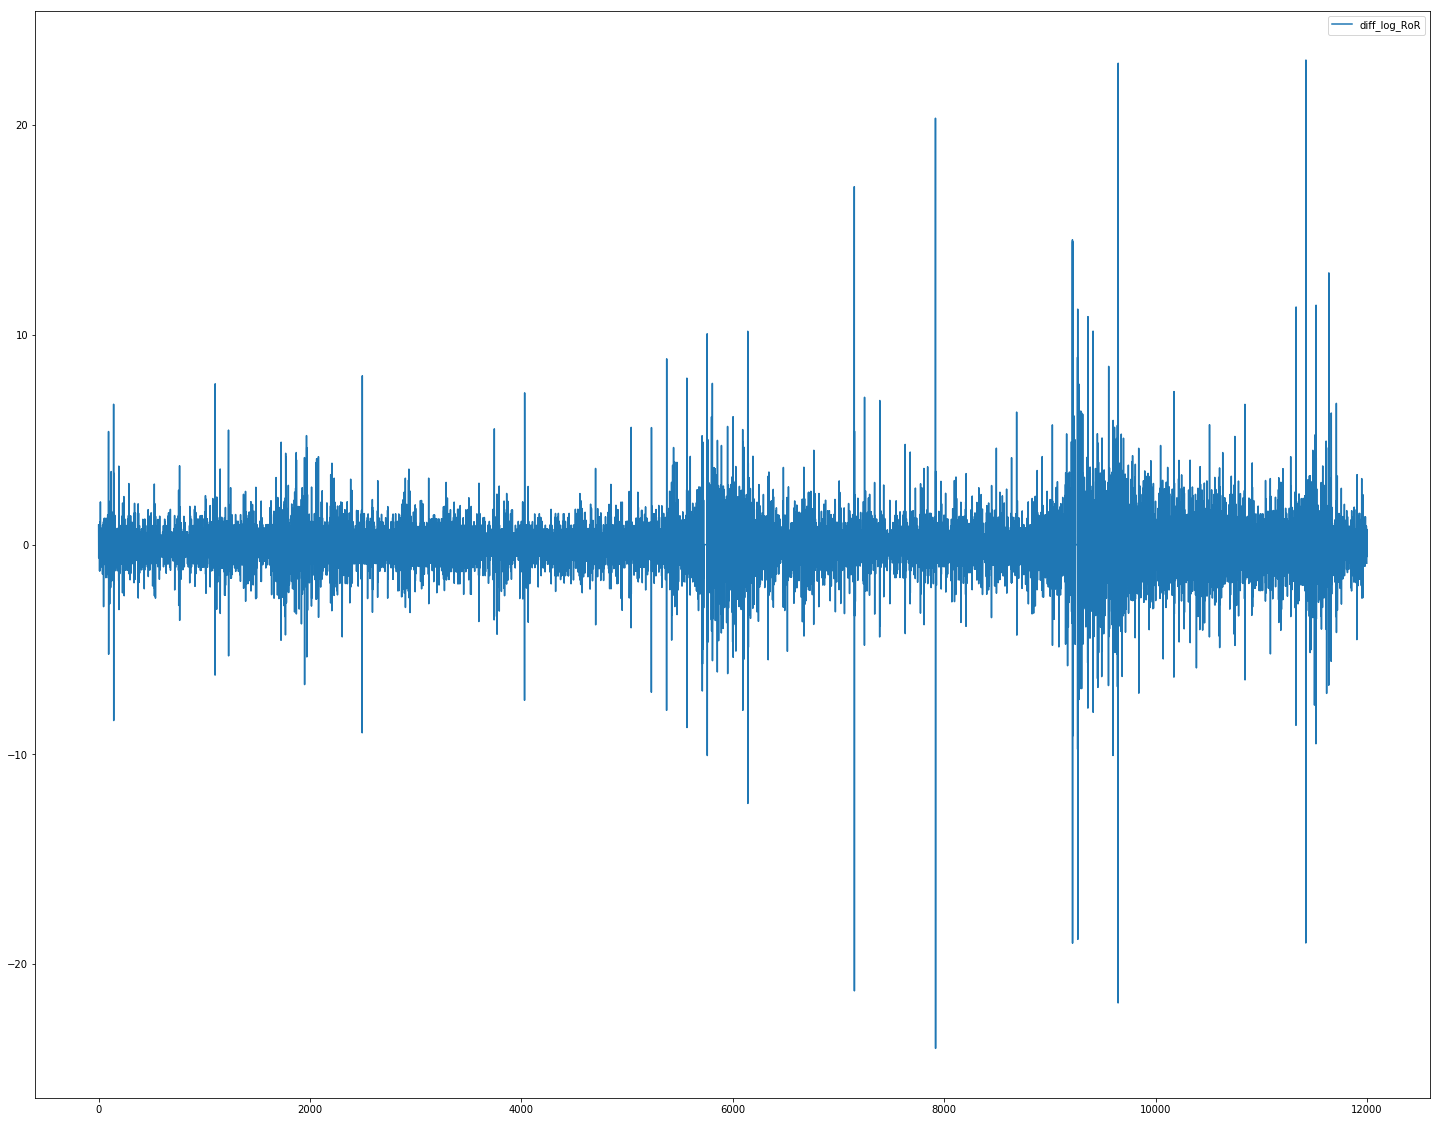

In [13]:
plt.figure(figsize=(25,20))
plt.plot(df['diff_NROR'][:12000], label='diff_log_RoR')
#plt.plot(df['open'][:12000],label='open')
plt.legend()
#plt.show()
plt.savefig('open.png')

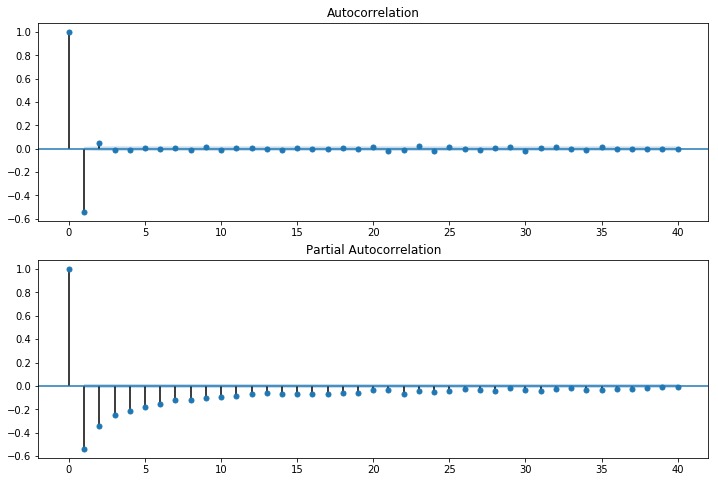

In [14]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = plot_acf(df['diff_NROR'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['diff_NROR'],lags=40,ax=ax2)

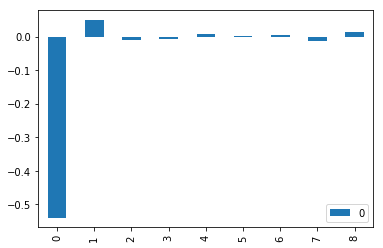

In [684]:
acf11 = acf(df['diff_NROR'])[1:10] 
df_test = pd.DataFrame(acf_1)
df_test.plot(kind='bar')
plt.savefig("acf")

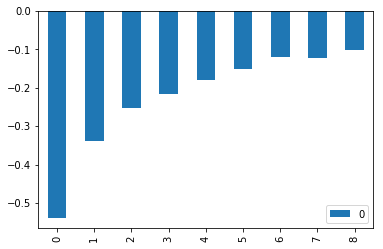

In [685]:
pacf_1 = pacf(df['diff_NROR'])[1:10]
df_test = pd.DataFrame(pacf_1)
df_test.plot(kind='bar')
plt.savefig("pacf")

In [512]:
adfuller(df['diff_NROR'],5)

(-93.29972095961237,
 0.0,
 5,
 16552,
 {'1%': -3.4307451374110194,
  '5%': -2.8617146348444935,
  '10%': -2.5668629537039385},
 49135.57694546924)

In [606]:
adf = adfuller(train,maxlag=3)
adf[0],adf[4]

(-97.27710067382131,
 {'1%': -3.4308952400676684,
  '5%': -2.8617809680917996,
  '10%': -2.566898262267538})

In [15]:
X = df['diff_NROR']
train = X[:9000]
test = X[9000:12000]
predictions =[]

In [16]:
train = train.reset_index(drop=True)            #### important to reset index
test = test.reset_index(drop=True) 

In [17]:
arima =ARIMA(train,order=(0,0,1))
arima_fit =arima.fit()
print(arima_fit.aic)

22456.543606237366


In [23]:
fitted_value = arima_fit.fittedvalues

In [28]:
train.mean()

0.00010374636065732256

In [26]:
fitted_value

0       0.000005
1      -0.468435
2       0.104054
3      -0.156053
4       0.249785
5      -0.052018
6       0.491483
7      -0.390940
8       0.208713
9      -0.656603
10      0.540200
11     -0.364899
12     -0.624719
13      0.580165
14     -0.187501
15      0.704242
16     -0.368307
17      0.688033
18     -1.277395
19     -0.171788
20      0.133977
21     -0.021236
22     -0.468383
23      0.149625
24     -0.305746
25      0.456256
26      0.138949
27     -0.618784
28     -0.145074
29      0.010473
          ...   
8970   -0.296919
8971    1.137161
8972    0.500777
8973    0.021288
8974   -0.298420
8975   -2.840738
8976   -2.969900
8977   -1.228679
8978    0.646826
8979    0.334907
8980    0.022041
8981   -0.447082
8982    0.804387
8983   -0.760275
8984   -0.290237
8985   -0.912923
8986   -1.529704
8987    0.487168
8988   -0.132615
8989   -0.287347
8990    0.022436
8991    0.177271
8992    1.263986
8993   -0.288591
8994   -0.753451
8995    0.177406
8996    0.022398
8997   -0.4423

In [24]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              diff_NROR   No. Observations:                 9000
Model:                     ARMA(0, 1)   Log Likelihood              -11225.272
Method:                       css-mle   S.D. of innovations              0.842
Date:                Tue, 12 Nov 2019   AIC                          22456.544
Time:                        15:39:24   BIC                          22477.859
Sample:                             0   HQIC                         22463.797
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.93e-06   3.42e-06      1.440      0.150   -1.78e-06    1.16e-05
ma.L1.diff_NROR    -1.0000      0.000  -3351.177      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [694]:
new_tuple = []
for i in range(test.size-5):
    a = (test[i],test[i+1],test[i+2],test[i+3],test[i+4])
    new_tuple.append(a)
#print(new_tuple,len(new_tuple))

def mieha(x1,x2,x3,x4,x5):
    return (-0.9258)*x1 + (-0.7551)*x2 + (-0.5755)*x3 + (-0.3850)*x4 +(-0.1841)*x5

pre = []
for (i,j,k,h,g) in new_tuple:
    res = mieha(i,j,k,h,g)
    pre.append(res)
print(pre,len(pre))

[-0.327695687485458, -0.7829631407601606, -0.9438869940015029, -0.46665002131037764, 2.1862708072077757, 0.14106016520409848, 0.2453038388373976, 2.0646728018081997, 0.5972431497161672, -0.7954078775536494, -0.65786183956632, -0.24186614981100896, 0.2731215054571861, -0.6693005903293594, 0.2493934151615277, -1.1007174824141819, 0.4328398183015088, -0.9840846478990246, 1.262053462818767, -0.15415990354937145, -1.0740966984324296, -0.753704004411638, 1.1602679271448482, -1.3367609590288234, -2.7964017527437965, 3.5214399045448257, -0.6567661342511717, 1.696401004667401, 3.6442690239010607, 0.8485674628793234, -0.7122720422422463, -1.2634431906038657, -0.615541105238438, -1.3350907349995502, -0.7390773288720025, 1.0370641667514193, 0.16013707147632017, 0.13972322097245127, -1.280663721897154, 0.18495921679785898, 0.5750842155203731, 2.764842159338145, -0.6156111304136627, 1.2609567924436038, -0.8469560656094569, 0.8060845889158139, -0.2587730039183855, -0.042446975226781175, -1.6129531662

In [698]:
compare = list(test[5:])

In [702]:
len(pre)

2995

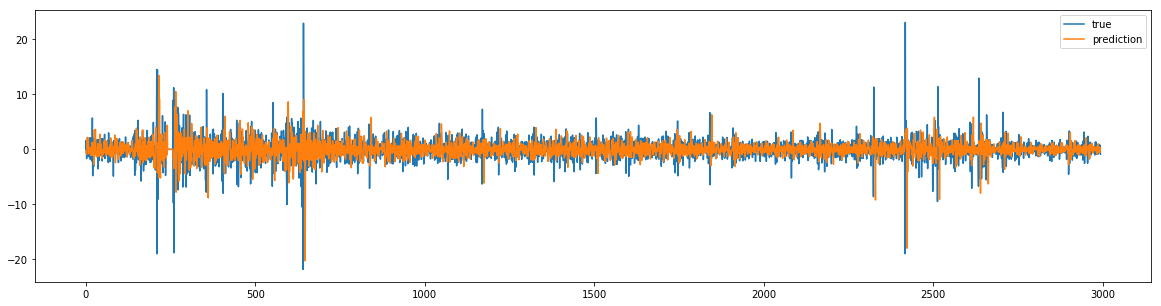

In [706]:
plt.figure(figsize=(20,5))
plt.plot(compare, label='true')
plt.plot(pre, label='prediction')
plt.legend()
#plt.show()
plt.savefig("test_pre")

In [744]:
RMSE = np.sqrt(mean_squared_error(compare,pre))
RMSE

2.5148461870214405

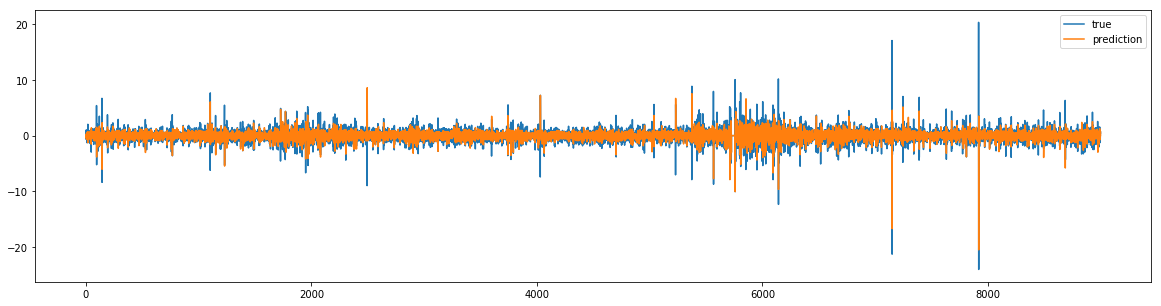

In [25]:
plt.figure(figsize=(20,5))
plt.plot(train, label='true')
plt.plot(fitted_value, label='prediction')
plt.legend()
plt.savefig("arima_pre")

In [719]:
fit = arima_fit.fittedvalues

In [726]:
MSE = mean_squared_error(train,fit)
MSE

0.8186040668753662

In [718]:
fit = fit.reset_index(drop=True)

In [720]:
residual = train - fit
residual

0       0.936876
1      -0.119083
2       0.187457
3      -0.302559
4       0.033458
5      -0.578328
6       0.330705
7      -0.172504
8       0.741533
9      -0.498039
10      0.374725
11      0.707778
12     -0.726029
13      0.090838
14     -0.848702
15      0.390054
16     -0.765517
17      1.378705
18      0.373396
19     -0.172167
20     -0.009840
21      0.328150
22     -0.299938
23      0.011363
24     -0.546280
25     -0.207223
26      0.595455
27      0.106023
28     -0.034895
29     -0.540429
          ...   
8970   -0.895178
8971   -0.245866
8972    0.235426
8973    0.629304
8974    3.073364
8975    2.981845
8976    0.784559
8977   -1.715206
8978   -1.627072
8979   -1.298666
8980   -0.731434
8981   -1.444080
8982    0.715106
8983    0.481434
8984    0.887226
8985    1.343603
8986   -0.873930
8987   -0.316157
8988   -0.286197
8989   -0.506962
8990   -0.631055
8991   -1.507810
8992    0.424833
8993    0.901781
8994   -0.070097
8995    0.090772
8996    0.570548
8997   -0.7633

In [721]:
new = pd.DataFrame([residual,train])
new = new.T

In [727]:
new

,residual,diff_NROR
0,0.936876,0.936885
1,-0.119083,-0.624508
2,0.187457,0.312131
3,-0.302559,-0.468279
4,0.033458,0.312213
5,-0.578328,-0.625409
6,0.330705,0.938277
7,-0.172504,-0.625737
8,0.741533,0.938277
9,-0.498039,-1.250818


In [722]:
new.rename(columns = {'Unnamed 0':'residual'},inplace=True)

In [723]:
new.to_csv("/Users/lvang/Desktop/hamon.csv",index = False)

In [743]:
test.to_csv("/Users/lvang/Desktop/saigo.csv",index = False)

F:\haha\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [739]:
new

0                                                    0.936885
1                                                   -0.624508
2                                                    0.312131
3                                                   -0.468279
4                                                    0.312213
5                                                   -0.625409
6                                                    0.938277
7                                                   -0.625737
8                                                    0.938277
9                                                    -1.25082
10                                                   0.938277
11                                                   0.311885
12                                                   -1.24951
13                                                   0.781065
14                                                  -0.938688
15                                                    1.09557
16      

In [190]:
new_tuple = []
for i in range(test.size-2):
    a = (test[i],test[i+1])
    new_tuple.append(a)
print(new_tuple,len(new_tuple))

pre = []
for i in test:
    res = mieha(i)
    pre.append(res)
print(pre)

def mieha(x1,x2,x3):
    z = 50.5847+0.93*x1+0.0477*x2+0.0216*x3
    return z

pre = []
for (i,j,k,h,g) in new_tuple:
    res = mieha(i,j,k,h,g)
    pre.append(res)
print(pre)

KeyError: 0

In [122]:
garch_11 = arch_model(train, vol='Garch', p=1, o=0, q=1, dist='Normal')